In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Add headers to mimic a real browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables and select the correct one
tables = soup.find_all('table')
print(f"Found {len(tables)} tables")  # Debugging line to check table count

# Use index 0 if there's only 1 table, or adjust based on actual table structure
table = tables[0]

tesla_revenue = pd.read_html(str(table))[0]
tesla_revenue.columns = ['Date', 'Revenue']

# Clean data
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r',|\$', '', regex=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

Found 6 tables


,Date,Revenue
11,2013,2013
12,2012,413
13,2011,204
14,2010,117
15,2009,112


In [7]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch data
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the first table (index 0)
table = soup.find_all('table')[0]

# Parse with StringIO to avoid warnings
gme_revenue = pd.read_html(StringIO(str(table)))[0]

# Clean data
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r',|\$', '', regex=True)
gme_revenue = gme_revenue.dropna()
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display last 5 rows
gme_revenue.tail()

,Date,Revenue
12,2013,8887
13,2012,9551
14,2011,9474
15,2010,9078
16,2009,8806


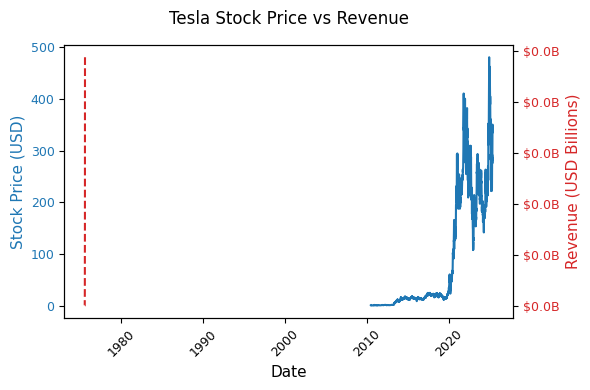

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Convert 'Revenue' to numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])

# Create figure with smaller size (width=10, height=5)
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot Tesla Stock Price
ax1.plot(tesla_data['Date'], tesla_data['Close'], color='tab:blue', label='Stock Price')
ax1.set_xlabel('Date', fontsize=11)
ax1.set_ylabel('Stock Price (USD)', fontsize=11, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=9)
ax1.tick_params(axis='x', labelsize=9, rotation=45)  # Keep rotation

# Add Revenue Axis
ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='tab:red', linestyle='--', label='Revenue')
ax2.set_ylabel('Revenue (USD Billions)', fontsize=11, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=9)

# Format revenue as $X.XB
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1e9:.1f}B'))

plt.title('Tesla Stock Price vs Revenue', fontsize=12, pad=15)
fig.tight_layout()
plt.show()

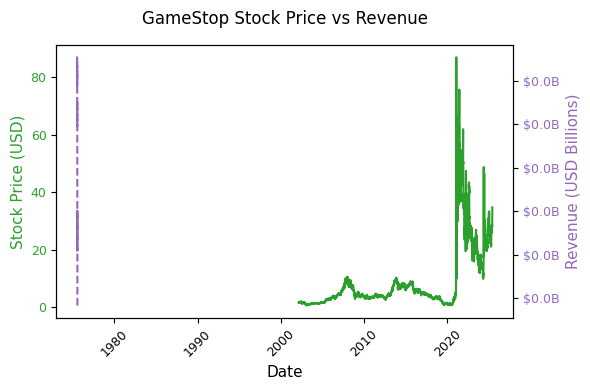

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Convert 'Revenue' to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Create figure with smaller size (width=10, height=5)
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot GameStop Stock Price
ax1.plot(gme_data['Date'], gme_data['Close'], color='tab:green', label='Stock Price')
ax1.set_xlabel('Date', fontsize=11)
ax1.set_ylabel('Stock Price (USD)', fontsize=11, color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green', labelsize=9)
ax1.tick_params(axis='x', labelsize=9, rotation=45)

# Add Revenue Axis
ax2 = ax1.twinx()
ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='tab:purple', linestyle='--', label='Revenue')
ax2.set_ylabel('Revenue (USD Billions)', fontsize=11, color='tab:purple')
ax2.tick_params(axis='y', labelcolor='tab:purple', labelsize=9)

# Format revenue
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1e9:.1f}B'))

plt.title('GameStop Stock Price vs Revenue', fontsize=12, pad=15)
fig.tight_layout()
plt.show()